# Data Aggregation 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("penguins_simple.csv", sep=";")

In [3]:
df.head()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE


## 1. Aggregation Functions
Aggregation function: takes multiple rows as input and returns a single value

In [4]:
df[['Body Mass (g)', 'Culmen Depth (mm)']].mean()

Body Mass (g)        4207.057057
Culmen Depth (mm)      17.164865
dtype: float64

In [6]:
df['Flipper Length (mm)'].argmin()

23

In [7]:
df[df['Flipper Length (mm)'] == df['Flipper Length (mm)'].min()]

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
23,Adelie,37.9,18.6,172.0,3150.0,FEMALE


In [8]:
df.min()

Species                Adelie
Culmen Length (mm)       32.1
Culmen Depth (mm)        13.1
Flipper Length (mm)       172
Body Mass (g)            2700
Sex                    FEMALE
dtype: object

In [9]:
df.nlargest(10, ['Culmen Length (mm)'])

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
246,Gentoo,59.6,17.0,230.0,6050.0,MALE
163,Chinstrap,58.0,17.8,181.0,3700.0,FEMALE
313,Gentoo,55.9,17.0,228.0,5600.0,MALE
209,Chinstrap,55.8,19.8,207.0,4000.0,MALE
326,Gentoo,55.1,16.0,230.0,5850.0,MALE
276,Gentoo,54.3,15.7,231.0,5650.0,MALE
177,Chinstrap,54.2,20.8,201.0,4300.0,MALE
185,Chinstrap,53.5,19.9,205.0,4500.0,MALE
318,Gentoo,53.4,15.8,219.0,5500.0,MALE
175,Chinstrap,52.8,20.0,205.0,4550.0,MALE


In [10]:
df.nsmallest(10, ['Culmen Length (mm)'])

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
136,Adelie,32.1,15.5,188.0,3050.0,FEMALE
92,Adelie,33.1,16.1,178.0,2900.0,FEMALE
64,Adelie,33.5,19.0,190.0,3600.0,FEMALE
86,Adelie,34.0,17.1,185.0,3400.0,FEMALE
13,Adelie,34.4,18.4,184.0,3325.0,FEMALE
48,Adelie,34.5,18.1,187.0,2900.0,FEMALE
9,Adelie,34.6,21.1,198.0,4400.0,MALE
74,Adelie,34.6,17.2,189.0,3200.0,FEMALE
46,Adelie,35.0,17.9,190.0,3450.0,FEMALE
94,Adelie,35.0,17.9,192.0,3725.0,FEMALE


In [12]:
df.count() # non-missing values row-wise

Species                333
Culmen Length (mm)     333
Culmen Depth (mm)      333
Flipper Length (mm)    333
Body Mass (g)          333
Sex                    333
dtype: int64

In [11]:
df.count(axis=1) # non-missing values column-wise

0      6
1      6
2      6
3      6
4      6
      ..
328    6
329    6
330    6
331    6
332    6
Length: 333, dtype: int64

In [14]:
df['Species'].count()

333

In [15]:
df['Species'].value_counts(normalize=True)

Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: Species, dtype: float64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              333 non-null    object 
 1   Culmen Length (mm)   333 non-null    float64
 2   Culmen Depth (mm)    333 non-null    float64
 3   Flipper Length (mm)  333 non-null    float64
 4   Body Mass (g)        333 non-null    float64
 5   Sex                  333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 15.7+ KB


In [17]:
df['Body Mass (g)'].apply(['sum', 'mean', 'count'])

sum      1.400950e+06
mean     4.207057e+03
count    3.330000e+02
Name: Body Mass (g), dtype: float64

In [19]:
df['Species'].apply(str.upper)

0      ADELIE
1      ADELIE
2      ADELIE
3      ADELIE
4      ADELIE
        ...  
328    GENTOO
329    GENTOO
330    GENTOO
331    GENTOO
332    GENTOO
Name: Species, Length: 333, dtype: object

In [20]:
df['Body Mass (g)'].apply(lambda x: x**2)

0      14062500.0
1      14440000.0
2      10562500.0
3      11902500.0
4      13322500.0
          ...    
328    24255625.0
329    23522500.0
330    33062500.0
331    27040000.0
332    29160000.0
Name: Body Mass (g), Length: 333, dtype: float64

### We can also use a function that we have written ourselves:

In [21]:
def myfunc(x):
    new = 0
    for x in np.array(x):
        new =+ x**2
        return new

In [22]:
df['Body Mass (g)'].apply(['sum', 'mean', myfunc])

sum       1.400950e+06
mean      4.207057e+03
myfunc    1.406250e+07
Name: Body Mass (g), dtype: float64

In [24]:
df.apply({'Body Mass (g)': 'mean', 'Culmen Length (mm)' : myfunc})

Body Mass (g)         4207.057057
Culmen Length (mm)    1528.810000
dtype: float64

In [ ]:
# OPTIONAL to check out: custom aggregation function with parameter
def sum_subset(array, threshold):
    sum_s = sum([x for x in array if x > threshold])
    return sum_s
df[['Body Mass (g)', 'Culmen Length (mm)']].apply(sum_subset, threshold=40)

## 2. Groupby-method

##### Question: what is the average weight of the penguins per group? 

In [26]:
df[df['Species'] == "Gentoo"]['Body Mass (g)'].mean()

5092.436974789916

Data Aggregation in Python is very closely linked to the `DataFrame.groupby()` statement:

- Splitting the data into groups based on some criteria.
- Applying a(n aggregate) function to each group independently.
- Combining the results into a data structure.

### 2.1. Split

In [29]:
df.groupby('Species').mean()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
Species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


In [30]:
df.groupby('Species').mean()['Body Mass (g)']

Species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: Body Mass (g), dtype: float64

In [31]:
grouped = df.groupby('Species')

In [33]:
#grouped.groups 
grouped.get_group('Adelie')

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
141,Adelie,36.6,18.4,184.0,3475.0,FEMALE
142,Adelie,36.0,17.8,195.0,3450.0,FEMALE
143,Adelie,37.8,18.1,193.0,3750.0,MALE
144,Adelie,36.0,17.1,187.0,3700.0,FEMALE


### 2.2. Apply  (and combine)

Apply does aggregates on a `pd.Series` (column)

In [35]:
df.groupby(['Species', 'Sex']).mean()

Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
Species   Sex                                                                  
Adelie    FEMALE           37.257534          17.621918           187.794521   
          MALE             40.390411          19.072603           192.410959   
Chinstrap FEMALE           46.573529          17.588235           191.735294   
          MALE             51.094118          19.252941           199.911765   
Gentoo    FEMALE           45.563793          14.237931           212.706897   
          MALE             49.473770          15.718033           221.540984   

                  Body Mass (g)  
Species   Sex                    
Adelie    FEMALE    3368.835616  
          MALE      4043.493151  
Chinstrap FEMALE    3527.205882  
          MALE      3938.970588  
Gentoo    FEMALE    4679.741379  
          MALE      5484.836066

In [38]:
df.groupby('Species').apply()

TypeError: apply() missing 1 required positional argument: 'func'

# Transform
Transform takes each `pd.Series` of a `pd.DataFrame` as input, applies a specified function to each element of the `pd.Series` and returns a `pd.Dataframe` of with the same number of rows

In [41]:
df.groupby('Species').transform('mean')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g)
0,38.823973,18.347260,190.102740,3706.164384
1,38.823973,18.347260,190.102740,3706.164384
2,38.823973,18.347260,190.102740,3706.164384
3,38.823973,18.347260,190.102740,3706.164384
4,38.823973,18.347260,190.102740,3706.164384
...,...,...,...,...
328,47.568067,14.996639,217.235294,5092.436975
329,47.568067,14.996639,217.235294,5092.436975
330,47.568067,14.996639,217.235294,5092.436975
331,47.568067,14.996639,217.235294,5092.436975


In [42]:
df['Mean_body_mass'] = df.groupby('Species').transform('mean')['Body Mass (g)']

In [43]:
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Mean_body_mass
0,Adelie,39.1,18.7,181.0,3750.0,MALE,3706.164384
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,3706.164384
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,3706.164384
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE,3706.164384
4,Adelie,39.3,20.6,190.0,3650.0,MALE,3706.164384
...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE,5092.436975
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE,5092.436975
330,Gentoo,50.4,15.7,222.0,5750.0,MALE,5092.436975
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE,5092.436975


# Exercises: 

- What is the percentage of male and female penguins in the dataset?
- What is the weight of the lightest male and female penguin? 
- Find the penguin with the longest beak.
- How much do all Gentoo-penguins weigh altogether?
- Which Flipper Length value appears 21 times in the dataset? 
- With help of the pandas documentation, try and understand what this line of code does exactly: 
`df.groupby(['Species', 'Sex'])['Sex'].count().unstack().plot.bar()`

In [44]:
# What is the percentage of male and female penguins in the dataset?
df['Sex'].value_counts(normalize=True)

MALE      0.504505
FEMALE    0.495495
Name: Sex, dtype: float64

In [46]:
# What is the weight of the lightest male and female penguin?
df.groupby('Sex').min()

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Mean_body_mass
Sex,,,,,,
FEMALE,Adelie,32.1,13.1,172.0,2700.0,3706.164384
MALE,Adelie,34.6,14.1,178.0,3250.0,3706.164384


In [47]:
# Find the penguin with the longest beak.
df[df['Culmen Length (mm)'] == df['Culmen Length (mm)'].max()]

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Mean_body_mass
246,Gentoo,59.6,17.0,230.0,6050.0,MALE,5092.436975


In [52]:
# How much do all Gentoo-penguins weigh altogether?
#df.groupby('Species').sum()
grouped.get_group('Gentoo')['Body Mass (g)'].sum()

606000.0

In [ ]:
# Which Flipper Length value appears 21 times in the dataset?



<AxesSubplot:xlabel='Species'>

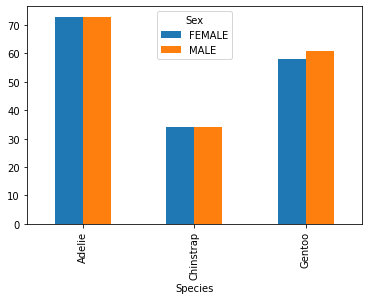

In [53]:
# With help of the pandas documentation, try and understand what this line of code does exactly:
# df.groupby(['Species', 'Sex'])['Sex'].count().unstack().plot.bar()
df.groupby(['Species', 'Sex'])['Sex'].count().unstack().plot.bar()
# With just eyeballing, looks like the sex column is counted and unstacked according to the groupby object
# and then the last bit plots the counts as a barplot

### If you are done with some of the above questions, you can: 
- practice pandas: see links at the bottom of this page: http://krspiced.pythonanywhere.com/chapters/project_gapminder/README.html
- do a challenge from the course material
- explore the dataset mentioned in step 1 and 2 of the "Animate a Scatterplot"-Challenge in http://krspiced.pythonanywhere.com/chapters/project_gapminder/long_vs_wide.html or any other dataset that you find interesting